## Calculate burst-glide statistics and lower-frequency speed changes for each fish in a trial

### Using speed data for each fish:
   - identify time windows without tracking errors/gaps
   - identify burst timing and features (max speed, peak-valley amplitude, rise time, fall time, potentially fit parameters)
   - get sliding burst rate and smoothed speed over time for analyzing speed crosscorrelation in lower frequencies
    

In [1]:
#import needed modules
import numpy as np
import matplotlib.pyplot as plt
import pickle
import pandas as pd  
from scipy.io import loadmat
import glob
import get_kinematics_adult as kin

In [2]:
# define directories and import list of lines
datadir = '../data/'
resultdir = 'savedresults/'

[treatments] = pickle.load(open(resultdir+'treatmentlist.pkl','rb'))
treatments = np.array(treatments)
numtreatments = len(treatments)
[focustreatments,notfocus] = pickle.load(open(resultdir+'focustreatmentlist.pkl','rb'))
[allnumtrials] = pickle.load(open(resultdir+'allnumtrials.pkl','rb'))

pxpercm = 4.02361434 * 10  # from tracker
dt=1/60

In [3]:
#import single line
tnum = 0  # select which line, 0 = WT
treatment = treatments[tnum]
numtrials = allnumtrials[tnum]
[trial_speeds,trial_trajectories,trial_headings,trial_theta,
            trial_smoothspeeds,trial_smoothtrajectories,trial_smoothheadings,
            trial_ellipses,trial_arena,trial_sex,
            datafiles,trial_trackingerrors] = pickle.load(open(datadir+treatment+'-alltrials.pkl','rb'))

In [4]:
#load fishpair distances from file
filename = datadir+treatment+'-dcoords+dist-heading.pkl'
[trial_dcoords,trial_dist] = pickle.load(open(filename,'rb'))

In [5]:
#select single trial for line and fish to include in analysis 
#define speed, position, & orientatino for current trial 
#(to do: set up to iterate through all trials & save relevant data)
trialnum = 8
fishIncl = np.arange(6) #maybe unecessary
nframes = trial_trajectories[trialnum].shape[0]
speeds = trial_speeds[trialnum].copy()
positions = trial_trajectories[trialnum].copy()
ori = trial_headings[trialnum].copy()

## Identify frames with bad data for each fish

In [50]:
#initialize badData dataframe; types: nan, flatspeed, doubleID (note which), other
errType = pd.DataFrame(np.zeros([nframes,fishIncl.size], dtype=int), columns = ['fish0','fish1','fish2','fish3','fish4','fish5'])
errType.index.name = 'frame'
errType.head()
errCode = {0: 'noError',
 1: 'missing',
 2: 'flatSpeed',
 30: 'doubleID_0',
 31: 'doubleID_1',
 32: 'doubleID_2',
 33: 'doubleID_3',
 34: 'doubleID_4',
 35: 'doubleID_5'}

In [51]:
#add nans/missing data to errType
errs = trial_trackingerrors[trialnum][:,fishIncl].copy()
errType[errs] = 1

In [56]:
#find flatspeed for each fish - speed does not change (or change < threshold); define as baddata
#currently doing for single frames, consider adding time threshold
tthresh = 10 #10 frames ~0.17s
accel = np.gradient(speeds,axis=0)
accel[1:] = speeds[1:]-speeds[0:-1]
accel[np.isnan(accel)] = 1.0 #set nans to real value > threshold
lowAcc = (np.abs(accel)<0.001)
errs = np.zeros(lowAcc.shape, dtype = bool)
for icol in range(lowAcc.shape[1]):
    for i in range(lowAcc.shape[0]):
        if np.all(lowAcc[i:i+tthresh,icol]):
            #print((i,icol))
            errs[i:i+tthresh,icol] = True

errType[errs] = 2

#kind of slow, but works

(119, 0)
(120, 0)
(121, 0)
(122, 0)
(123, 0)
(124, 0)
(125, 0)
(126, 0)
(127, 0)
(128, 0)
(129, 0)
(130, 0)
(131, 0)
(132, 0)
(133, 0)
(134, 0)
(135, 0)
(136, 0)
(137, 0)
(138, 0)
(327, 0)
(328, 0)
(329, 0)
(330, 0)
(331, 0)
(332, 0)
(333, 0)
(334, 0)
(335, 0)
(336, 0)
(337, 0)
(338, 0)
(339, 0)
(340, 0)
(341, 0)
(342, 0)
(343, 0)
(344, 0)
(345, 0)
(346, 0)
(347, 0)
(348, 0)
(349, 0)
(350, 0)
(351, 0)
(352, 0)
(353, 0)
(354, 0)
(355, 0)
(356, 0)
(357, 0)
(358, 0)
(359, 0)
(360, 0)
(361, 0)
(362, 0)
(363, 0)
(364, 0)
(365, 0)
(366, 0)
(367, 0)
(400, 0)
(401, 0)
(402, 0)
(403, 0)
(404, 0)
(405, 0)
(406, 0)
(407, 0)
(408, 0)
(409, 0)
(410, 0)
(411, 0)
(412, 0)
(413, 0)
(414, 0)
(415, 0)
(416, 0)
(417, 0)
(418, 0)
(419, 0)
(420, 0)
(421, 0)
(422, 0)
(423, 0)
(424, 0)
(425, 0)
(426, 0)
(427, 0)
(428, 0)
(429, 0)
(430, 0)
(431, 0)
(432, 0)
(433, 0)
(434, 0)
(435, 0)
(436, 0)
(437, 0)
(438, 0)
(439, 0)
(440, 0)
(441, 0)
(442, 0)
(443, 0)
(444, 0)
(445, 0)
(446, 0)
(447, 0)
(448, 0)
(449, 0)
(

(40877, 0)
(40878, 0)
(40879, 0)
(40880, 0)
(40881, 0)
(40882, 0)
(40883, 0)
(40884, 0)
(40885, 0)
(40886, 0)
(40887, 0)
(40888, 0)
(40889, 0)
(40890, 0)
(40891, 0)
(40892, 0)
(40893, 0)
(40894, 0)
(40895, 0)
(40896, 0)
(40897, 0)
(40898, 0)
(40899, 0)
(40900, 0)
(40901, 0)
(40902, 0)
(40903, 0)
(40904, 0)
(40905, 0)
(40906, 0)
(40907, 0)
(40908, 0)
(40909, 0)
(42322, 0)
(42323, 0)
(42324, 0)
(42325, 0)
(42326, 0)
(42327, 0)
(42328, 0)
(42329, 0)
(42330, 0)
(42331, 0)
(42332, 0)
(42333, 0)
(42334, 0)
(42335, 0)
(42336, 0)
(42337, 0)
(42338, 0)
(42339, 0)
(42340, 0)
(42341, 0)
(42342, 0)
(42343, 0)
(42344, 0)
(42345, 0)
(42346, 0)
(42347, 0)
(42348, 0)
(42349, 0)
(42350, 0)
(42651, 0)
(42652, 0)
(42653, 0)
(42654, 0)
(42655, 0)
(42656, 0)
(42657, 0)
(44872, 0)
(44873, 0)
(44874, 0)
(44875, 0)
(44876, 0)
(45027, 0)
(45028, 0)
(45029, 0)
(45030, 0)
(45031, 0)
(45032, 0)
(45033, 0)
(45034, 0)
(45035, 0)
(45036, 0)
(45037, 0)
(45038, 0)
(45039, 0)
(45074, 0)
(45075, 0)
(45076, 0)
(45077, 0)

(81167, 0)
(81168, 0)
(81169, 0)
(81170, 0)
(81171, 0)
(81172, 0)
(81173, 0)
(81174, 0)
(81175, 0)
(81176, 0)
(81177, 0)
(81178, 0)
(81179, 0)
(81180, 0)
(81181, 0)
(82589, 0)
(82590, 0)
(82591, 0)
(82592, 0)
(82593, 0)
(82594, 0)
(82595, 0)
(82596, 0)
(82597, 0)
(82598, 0)
(82599, 0)
(82600, 0)
(82601, 0)
(82602, 0)
(82603, 0)
(82604, 0)
(82605, 0)
(82606, 0)
(82607, 0)
(82608, 0)
(82609, 0)
(82610, 0)
(82611, 0)
(82612, 0)
(82613, 0)
(82614, 0)
(82615, 0)
(82616, 0)
(82617, 0)
(82618, 0)
(82619, 0)
(82620, 0)
(82621, 0)
(82622, 0)
(82623, 0)
(82624, 0)
(82625, 0)
(82626, 0)
(82627, 0)
(82628, 0)
(82629, 0)
(82630, 0)
(82910, 0)
(82911, 0)
(82912, 0)
(82913, 0)
(82914, 0)
(83123, 0)
(83124, 0)
(83125, 0)
(83126, 0)
(83127, 0)
(83275, 0)
(83276, 0)
(83277, 0)
(85089, 0)
(85090, 0)
(85735, 0)
(88376, 0)
(88377, 0)
(88378, 0)
(88379, 0)
(88380, 0)
(88381, 0)
(88382, 0)
(88383, 0)
(88384, 0)
(88385, 0)
(88386, 0)
(88387, 0)
(88388, 0)
(88389, 0)
(88390, 0)
(88391, 0)
(88392, 0)
(88393, 0)

(20309, 1)
(20310, 1)
(20311, 1)
(20312, 1)
(20313, 1)
(20314, 1)
(20315, 1)
(20316, 1)
(20317, 1)
(20318, 1)
(20319, 1)
(20320, 1)
(20321, 1)
(20322, 1)
(20323, 1)
(20324, 1)
(20325, 1)
(20326, 1)
(20327, 1)
(20328, 1)
(20329, 1)
(20330, 1)
(20331, 1)
(20332, 1)
(20333, 1)
(20334, 1)
(20335, 1)
(20336, 1)
(20337, 1)
(20338, 1)
(21480, 1)
(21481, 1)
(23426, 1)
(23427, 1)
(23428, 1)
(23429, 1)
(23430, 1)
(23431, 1)
(25726, 1)
(25727, 1)
(25728, 1)
(25729, 1)
(25730, 1)
(25731, 1)
(25732, 1)
(25733, 1)
(25734, 1)
(25735, 1)
(25736, 1)
(25737, 1)
(25738, 1)
(25739, 1)
(25740, 1)
(25741, 1)
(25742, 1)
(25743, 1)
(25744, 1)
(25745, 1)
(25746, 1)
(25747, 1)
(25748, 1)
(25749, 1)
(28630, 1)
(28631, 1)
(28632, 1)
(28633, 1)
(30476, 1)
(30477, 1)
(30478, 1)
(30479, 1)
(30480, 1)
(30481, 1)
(30482, 1)
(30483, 1)
(30484, 1)
(30485, 1)
(30486, 1)
(30487, 1)
(30773, 1)
(32400, 1)
(32401, 1)
(32402, 1)
(32403, 1)
(32404, 1)
(32405, 1)
(32406, 1)
(32407, 1)
(32408, 1)
(32409, 1)
(32410, 1)
(32424, 1)

(80947, 1)
(80948, 1)
(80949, 1)
(80950, 1)
(80951, 1)
(80952, 1)
(80953, 1)
(80954, 1)
(80955, 1)
(80956, 1)
(80957, 1)
(80958, 1)
(80959, 1)
(80960, 1)
(80961, 1)
(80962, 1)
(80963, 1)
(80964, 1)
(80965, 1)
(80966, 1)
(80967, 1)
(80968, 1)
(80969, 1)
(80970, 1)
(80971, 1)
(80972, 1)
(80973, 1)
(80974, 1)
(80975, 1)
(80976, 1)
(80977, 1)
(80978, 1)
(80979, 1)
(80980, 1)
(80981, 1)
(80982, 1)
(80983, 1)
(80984, 1)
(80985, 1)
(80986, 1)
(80987, 1)
(80988, 1)
(80989, 1)
(80990, 1)
(80991, 1)
(80992, 1)
(80993, 1)
(80994, 1)
(80995, 1)
(80996, 1)
(80997, 1)
(80998, 1)
(80999, 1)
(81000, 1)
(81001, 1)
(81002, 1)
(81003, 1)
(81004, 1)
(81005, 1)
(81006, 1)
(81007, 1)
(81008, 1)
(81009, 1)
(81010, 1)
(81011, 1)
(81012, 1)
(81013, 1)
(81014, 1)
(81015, 1)
(81016, 1)
(81017, 1)
(81018, 1)
(81019, 1)
(81020, 1)
(81021, 1)
(81022, 1)
(81023, 1)
(81024, 1)
(81025, 1)
(81026, 1)
(81027, 1)
(81028, 1)
(81029, 1)
(81030, 1)
(81031, 1)
(81032, 1)
(81033, 1)
(81034, 1)
(81035, 1)
(81036, 1)
(81037, 1)

(17406, 2)
(17407, 2)
(17408, 2)
(17409, 2)
(17410, 2)
(17722, 2)
(17723, 2)
(17724, 2)
(17725, 2)
(17726, 2)
(17727, 2)
(17728, 2)
(17729, 2)
(17730, 2)
(17731, 2)
(17732, 2)
(17733, 2)
(17734, 2)
(18270, 2)
(18271, 2)
(18272, 2)
(18273, 2)
(18274, 2)
(18275, 2)
(19286, 2)
(19287, 2)
(19288, 2)
(19289, 2)
(19290, 2)
(19564, 2)
(19565, 2)
(19566, 2)
(19567, 2)
(19568, 2)
(19569, 2)
(19570, 2)
(19713, 2)
(19714, 2)
(19715, 2)
(19716, 2)
(19717, 2)
(19718, 2)
(19719, 2)
(19720, 2)
(19721, 2)
(19722, 2)
(19723, 2)
(19724, 2)
(19725, 2)
(19726, 2)
(19727, 2)
(19728, 2)
(19729, 2)
(19730, 2)
(19731, 2)
(19732, 2)
(19733, 2)
(19734, 2)
(19735, 2)
(19736, 2)
(19737, 2)
(19738, 2)
(19739, 2)
(19740, 2)
(19741, 2)
(19742, 2)
(19743, 2)
(19744, 2)
(19745, 2)
(19746, 2)
(19747, 2)
(19748, 2)
(19749, 2)
(19750, 2)
(19751, 2)
(19752, 2)
(19753, 2)
(19754, 2)
(19755, 2)
(19756, 2)
(19757, 2)
(19758, 2)
(19759, 2)
(19760, 2)
(19761, 2)
(19762, 2)
(19763, 2)
(19764, 2)
(19765, 2)
(19766, 2)
(19767, 2)

(51860, 2)
(51861, 2)
(51862, 2)
(51863, 2)
(51864, 2)
(51865, 2)
(51866, 2)
(51867, 2)
(51868, 2)
(51869, 2)
(51870, 2)
(51871, 2)
(51872, 2)
(51873, 2)
(51874, 2)
(51875, 2)
(51876, 2)
(51877, 2)
(51878, 2)
(51879, 2)
(51880, 2)
(51881, 2)
(51882, 2)
(51883, 2)
(51884, 2)
(51885, 2)
(51886, 2)
(51887, 2)
(51888, 2)
(51889, 2)
(51890, 2)
(51891, 2)
(51892, 2)
(51893, 2)
(51894, 2)
(51895, 2)
(51896, 2)
(51897, 2)
(51898, 2)
(51899, 2)
(51900, 2)
(51901, 2)
(51902, 2)
(51903, 2)
(51904, 2)
(51905, 2)
(51906, 2)
(51907, 2)
(51908, 2)
(51909, 2)
(51910, 2)
(51911, 2)
(51912, 2)
(51913, 2)
(51914, 2)
(51915, 2)
(51916, 2)
(51917, 2)
(51918, 2)
(51919, 2)
(51920, 2)
(51921, 2)
(51922, 2)
(51923, 2)
(51924, 2)
(51925, 2)
(51926, 2)
(51927, 2)
(51928, 2)
(51929, 2)
(51930, 2)
(51931, 2)
(51932, 2)
(51933, 2)
(51934, 2)
(51935, 2)
(51936, 2)
(51937, 2)
(51938, 2)
(51939, 2)
(51940, 2)
(51941, 2)
(51942, 2)
(51943, 2)
(51944, 2)
(51945, 2)
(51946, 2)
(51947, 2)
(51948, 2)
(51949, 2)
(51950, 2)

(93928, 2)
(93929, 2)
(93930, 2)
(93931, 2)
(93932, 2)
(93933, 2)
(93934, 2)
(93935, 2)
(93936, 2)
(93937, 2)
(93938, 2)
(93939, 2)
(93940, 2)
(93941, 2)
(93942, 2)
(93943, 2)
(93944, 2)
(93945, 2)
(93975, 2)
(93976, 2)
(93977, 2)
(93978, 2)
(93979, 2)
(93980, 2)
(93981, 2)
(93982, 2)
(93983, 2)
(93984, 2)
(93985, 2)
(93986, 2)
(93987, 2)
(93988, 2)
(93989, 2)
(93990, 2)
(93991, 2)
(93992, 2)
(93993, 2)
(93994, 2)
(93995, 2)
(93996, 2)
(93997, 2)
(93998, 2)
(93999, 2)
(94000, 2)
(94001, 2)
(94002, 2)
(94003, 2)
(94004, 2)
(94005, 2)
(94006, 2)
(94007, 2)
(94008, 2)
(94009, 2)
(94010, 2)
(94011, 2)
(94012, 2)
(94013, 2)
(94014, 2)
(94015, 2)
(94016, 2)
(94017, 2)
(94018, 2)
(94019, 2)
(94020, 2)
(94021, 2)
(94022, 2)
(94023, 2)
(94024, 2)
(94025, 2)
(94026, 2)
(94027, 2)
(94028, 2)
(94029, 2)
(94030, 2)
(94031, 2)
(94059, 2)
(94060, 2)
(94061, 2)
(94062, 2)
(94063, 2)
(94064, 2)
(94065, 2)
(94066, 2)
(94067, 2)
(94068, 2)
(94069, 2)
(94070, 2)
(94071, 2)
(94072, 2)
(94073, 2)
(94074, 2)

(38021, 3)
(38022, 3)
(38023, 3)
(38024, 3)
(38025, 3)
(38026, 3)
(38027, 3)
(38028, 3)
(38029, 3)
(38030, 3)
(38031, 3)
(38032, 3)
(38033, 3)
(38034, 3)
(38035, 3)
(38036, 3)
(38860, 3)
(38861, 3)
(38862, 3)
(38863, 3)
(38864, 3)
(38865, 3)
(38866, 3)
(38867, 3)
(38868, 3)
(38869, 3)
(38870, 3)
(38871, 3)
(38872, 3)
(38873, 3)
(38874, 3)
(38875, 3)
(38876, 3)
(38877, 3)
(38878, 3)
(38879, 3)
(38880, 3)
(38881, 3)
(38882, 3)
(38883, 3)
(38884, 3)
(38885, 3)
(38886, 3)
(38887, 3)
(38888, 3)
(38889, 3)
(38890, 3)
(38891, 3)
(38892, 3)
(38893, 3)
(38894, 3)
(38895, 3)
(38896, 3)
(38897, 3)
(38898, 3)
(38899, 3)
(38900, 3)
(38901, 3)
(38902, 3)
(38903, 3)
(38904, 3)
(38905, 3)
(38906, 3)
(38907, 3)
(38908, 3)
(38909, 3)
(38910, 3)
(38911, 3)
(38912, 3)
(38913, 3)
(38914, 3)
(38915, 3)
(38916, 3)
(38917, 3)
(38918, 3)
(38919, 3)
(38920, 3)
(38921, 3)
(38922, 3)
(38923, 3)
(38924, 3)
(38925, 3)
(38926, 3)
(38927, 3)
(38928, 3)
(38929, 3)
(38930, 3)
(38931, 3)
(38932, 3)
(38933, 3)
(38934, 3)

(80076, 3)
(80077, 3)
(80078, 3)
(80079, 3)
(80080, 3)
(80081, 3)
(80082, 3)
(80083, 3)
(80084, 3)
(80085, 3)
(80086, 3)
(80087, 3)
(80088, 3)
(80089, 3)
(80090, 3)
(80091, 3)
(80092, 3)
(80093, 3)
(80094, 3)
(80095, 3)
(80096, 3)
(80097, 3)
(80098, 3)
(80099, 3)
(80100, 3)
(80101, 3)
(80102, 3)
(80103, 3)
(80177, 3)
(80178, 3)
(80179, 3)
(80180, 3)
(80646, 3)
(82245, 3)
(82246, 3)
(82247, 3)
(82248, 3)
(82249, 3)
(82250, 3)
(82251, 3)
(82252, 3)
(82253, 3)
(82254, 3)
(82255, 3)
(82256, 3)
(82257, 3)
(82258, 3)
(82259, 3)
(82260, 3)
(82261, 3)
(82262, 3)
(82263, 3)
(82264, 3)
(82265, 3)
(83407, 3)
(83408, 3)
(83409, 3)
(83410, 3)
(83411, 3)
(83412, 3)
(83445, 3)
(83446, 3)
(83447, 3)
(83448, 3)
(83449, 3)
(83450, 3)
(83451, 3)
(83452, 3)
(83468, 3)
(83469, 3)
(83470, 3)
(84611, 3)
(84612, 3)
(84613, 3)
(84614, 3)
(84615, 3)
(84616, 3)
(84617, 3)
(84618, 3)
(84619, 3)
(84620, 3)
(84621, 3)
(84622, 3)
(84623, 3)
(84624, 3)
(84625, 3)
(84626, 3)
(84627, 3)
(84628, 3)
(84629, 3)
(84630, 3)

(19624, 4)
(19625, 4)
(19626, 4)
(19627, 4)
(19628, 4)
(19629, 4)
(19630, 4)
(19631, 4)
(19632, 4)
(19633, 4)
(19634, 4)
(19686, 4)
(19687, 4)
(19688, 4)
(19689, 4)
(19690, 4)
(19691, 4)
(19692, 4)
(19693, 4)
(19694, 4)
(19695, 4)
(19696, 4)
(19697, 4)
(19698, 4)
(19699, 4)
(19700, 4)
(19701, 4)
(19702, 4)
(19703, 4)
(19704, 4)
(19705, 4)
(19706, 4)
(19707, 4)
(19708, 4)
(19709, 4)
(19710, 4)
(20048, 4)
(20049, 4)
(20050, 4)
(20051, 4)
(20052, 4)
(20053, 4)
(20088, 4)
(20381, 4)
(20382, 4)
(20383, 4)
(20384, 4)
(20385, 4)
(20386, 4)
(20500, 4)
(20501, 4)
(20502, 4)
(20503, 4)
(20504, 4)
(20505, 4)
(20506, 4)
(20507, 4)
(20508, 4)
(20509, 4)
(20510, 4)
(20511, 4)
(20512, 4)
(20513, 4)
(20514, 4)
(20515, 4)
(20516, 4)
(20517, 4)
(20518, 4)
(20519, 4)
(20520, 4)
(20521, 4)
(20522, 4)
(20523, 4)
(20524, 4)
(20525, 4)
(20526, 4)
(20527, 4)
(20528, 4)
(20529, 4)
(20530, 4)
(20531, 4)
(20532, 4)
(20533, 4)
(20534, 4)
(20535, 4)
(20536, 4)
(20537, 4)
(20538, 4)
(20539, 4)
(20540, 4)
(20541, 4)

(59838, 4)
(59839, 4)
(59840, 4)
(59841, 4)
(59842, 4)
(59843, 4)
(59844, 4)
(59845, 4)
(59846, 4)
(59847, 4)
(59848, 4)
(59849, 4)
(59850, 4)
(59851, 4)
(59852, 4)
(59853, 4)
(59915, 4)
(59916, 4)
(59917, 4)
(59918, 4)
(59919, 4)
(59920, 4)
(59921, 4)
(59922, 4)
(59923, 4)
(59924, 4)
(59925, 4)
(59926, 4)
(59927, 4)
(59928, 4)
(59929, 4)
(59930, 4)
(59931, 4)
(59932, 4)
(60308, 4)
(60309, 4)
(60310, 4)
(60311, 4)
(60408, 4)
(60409, 4)
(60410, 4)
(60411, 4)
(60412, 4)
(60413, 4)
(60414, 4)
(60415, 4)
(60416, 4)
(60417, 4)
(60418, 4)
(60419, 4)
(60420, 4)
(60421, 4)
(60422, 4)
(60423, 4)
(60424, 4)
(60425, 4)
(60426, 4)
(60427, 4)
(60428, 4)
(60429, 4)
(60430, 4)
(60431, 4)
(60432, 4)
(60433, 4)
(61630, 4)
(61631, 4)
(61632, 4)
(61633, 4)
(61634, 4)
(61635, 4)
(61636, 4)
(61637, 4)
(61638, 4)
(61639, 4)
(61640, 4)
(61641, 4)
(61642, 4)
(61643, 4)
(62158, 4)
(62159, 4)
(62160, 4)
(65058, 4)
(65059, 4)
(65212, 4)
(65213, 4)
(65214, 4)
(65215, 4)
(65216, 4)
(65217, 4)
(65218, 4)
(65219, 4)

(97517, 4)
(97518, 4)
(97519, 4)
(97520, 4)
(97521, 4)
(97522, 4)
(97523, 4)
(97524, 4)
(97525, 4)
(97526, 4)
(97527, 4)
(97528, 4)
(97529, 4)
(100010, 4)
(100497, 4)
(100498, 4)
(100499, 4)
(100515, 4)
(100516, 4)
(100517, 4)
(100518, 4)
(100519, 4)
(100520, 4)
(100521, 4)
(100522, 4)
(100523, 4)
(100524, 4)
(100525, 4)
(100947, 4)
(100948, 4)
(100949, 4)
(100950, 4)
(100951, 4)
(100952, 4)
(100953, 4)
(100954, 4)
(100955, 4)
(100956, 4)
(100957, 4)
(100958, 4)
(100959, 4)
(100960, 4)
(100961, 4)
(100962, 4)
(100963, 4)
(100964, 4)
(100965, 4)
(100966, 4)
(100967, 4)
(100968, 4)
(100969, 4)
(100970, 4)
(100971, 4)
(100972, 4)
(100973, 4)
(100974, 4)
(100975, 4)
(100976, 4)
(100977, 4)
(100978, 4)
(100979, 4)
(100980, 4)
(100981, 4)
(100982, 4)
(100983, 4)
(100984, 4)
(100985, 4)
(100986, 4)
(100987, 4)
(100988, 4)
(100989, 4)
(100990, 4)
(101060, 4)
(101061, 4)
(101062, 4)
(101063, 4)
(101064, 4)
(101065, 4)
(101066, 4)
(101067, 4)
(101068, 4)
(101069, 4)
(101070, 4)
(101071, 4)
(1010

(36142, 5)
(37566, 5)
(37567, 5)
(37568, 5)
(37569, 5)
(37570, 5)
(39900, 5)
(39901, 5)
(39902, 5)
(39903, 5)
(39904, 5)
(39905, 5)
(39906, 5)
(39907, 5)
(39908, 5)
(39909, 5)
(39910, 5)
(39911, 5)
(39912, 5)
(39913, 5)
(39914, 5)
(39915, 5)
(39916, 5)
(39917, 5)
(39918, 5)
(39919, 5)
(39920, 5)
(39921, 5)
(39922, 5)
(39923, 5)
(39924, 5)
(39925, 5)
(39926, 5)
(39927, 5)
(39928, 5)
(39929, 5)
(39930, 5)
(39931, 5)
(39932, 5)
(39933, 5)
(39934, 5)
(39935, 5)
(39936, 5)
(39937, 5)
(39938, 5)
(39939, 5)
(39940, 5)
(39941, 5)
(39942, 5)
(39943, 5)
(39944, 5)
(39945, 5)
(39946, 5)
(39947, 5)
(39948, 5)
(39949, 5)
(39950, 5)
(39951, 5)
(39952, 5)
(39953, 5)
(39954, 5)
(39955, 5)
(39956, 5)
(39957, 5)
(39958, 5)
(39959, 5)
(39960, 5)
(39961, 5)
(39962, 5)
(39963, 5)
(39964, 5)
(39965, 5)
(39966, 5)
(39967, 5)
(39968, 5)
(39969, 5)
(39970, 5)
(39971, 5)
(39972, 5)
(39973, 5)
(39974, 5)
(39975, 5)
(39976, 5)
(39977, 5)
(39978, 5)
(39979, 5)
(39980, 5)
(39981, 5)
(39982, 5)
(39983, 5)
(39984, 5)

(76930, 5)
(76931, 5)
(76932, 5)
(76933, 5)
(76934, 5)
(76935, 5)
(76936, 5)
(76937, 5)
(76938, 5)
(76939, 5)
(76940, 5)
(76941, 5)
(82631, 5)
(82632, 5)
(82633, 5)
(82634, 5)
(82635, 5)
(82636, 5)
(82637, 5)
(82638, 5)
(82639, 5)
(82640, 5)
(82641, 5)
(82642, 5)
(82643, 5)
(82644, 5)
(82645, 5)
(82646, 5)
(82647, 5)
(82648, 5)
(82649, 5)
(82650, 5)
(82651, 5)
(82652, 5)
(82653, 5)
(82654, 5)
(82655, 5)
(82656, 5)
(82657, 5)
(82658, 5)
(82659, 5)
(82660, 5)
(82661, 5)
(82662, 5)
(82663, 5)
(82664, 5)
(82665, 5)
(82666, 5)
(82667, 5)
(82668, 5)
(82669, 5)
(82670, 5)
(82671, 5)
(82672, 5)
(82673, 5)
(82674, 5)
(82675, 5)
(82676, 5)
(82677, 5)
(82678, 5)
(82679, 5)
(82680, 5)
(82681, 5)
(82682, 5)
(82683, 5)
(82684, 5)
(82685, 5)
(82686, 5)
(82687, 5)
(82688, 5)
(82689, 5)
(82690, 5)
(82691, 5)
(82692, 5)
(82693, 5)
(82694, 5)
(82695, 5)
(82696, 5)
(82697, 5)
(82698, 5)
(82699, 5)
(82700, 5)
(82701, 5)
(82702, 5)
(82703, 5)
(82704, 5)
(82705, 5)
(82706, 5)
(82707, 5)
(82708, 5)
(82709, 5)

In [53]:
errType[errs]

,fish0,fish1,fish2,fish3,fish4,fish5
frame,,,,,,
119,2,0,0,0,0,0
120,2,0,0,0,0,0
121,2,0,0,0,0,0
122,2,0,0,0,0,0
123,2,0,0,0,0,0
...,...,...,...,...,...,...
107647,0,0,0,2,0,0
107648,0,0,0,2,0,0
107649,0,0,0,2,0,0


In [9]:
#add additional nans (not included in trackingerrors, not sure why)
errs = np.isnan(speeds)
errType[errs] = 1 #may change to another code, but for now treating all gaps the same way

In [10]:
#define baddata for at least one fish in pair when [dist,oridiff] < threshold (doubleID error)

#for each fishpair, each time point, get distance (trial_dist from file) and orientation diff (subtr heading)
dthresh = pxpercm #1 cm, ~40 pixels; same threshold used in paper; I may use looser threshold
othresh = .2 #taken from paper

for i in fishIncl:
    col0 = errType.columns[i]
    errcode1 = 30 + i
    for j in range(i+1,fishIncl.size):
        col1 = errType.columns[j]
        errcode0 = 30 +j
        dpair = trial_dist[trialnum][:,i,j].copy() 
        dpair[np.isnan(dpair)] = 100 #set nans to high values to avoid invalid values and false errID
        oridiff = trial_headings[trialnum][:,i]-trial_headings[trialnum][:,j]
        oridiff[np.isnan(oridiff)] = 6 #set nans to high values to avoid invalid values and false errID
        indErr = (abs(oridiff) < othresh) & (dpair < dthresh)
        errType.loc[indErr,col0] = errcode0
        errType.loc[indErr,col1] = errcode1

## Restore speed and position for nans during bursts 
- These were filtered by acceleration filter in original data processing, which was needed to remove tracking "jumps"
- Filtering by gap duration and the speed change makes it possible to determine which of these are likely bursts and add the data back
- Note: I'm only doing this locally for now, not resaving the pickle; may consider running through for everything and then saving if (1) it takes a long time and (2) I'm comfortable that I've validated the process well

In [11]:
groupdatadir = datadir + 'raw/' 
datafiles = np.sort([str.split(s,'/')[-1] for s in glob.glob(groupdatadir+ treatment +'/*mat')])

#open datafile (one for now, set to iterate through after tests); get trajectories, speed, heading
data = loadmat(groupdatadir + datafiles[trialnum])
def loadval(dictval):
    return np.array([t[0][0] for t in (np.array(data['trx'][dictval]).T)]) 
data_x = loadval('x')
data_y = loadval('y')
trajectories_raw = np.array([data_x,data_y]).T
velocities = np.gradient(trajectories_raw,axis=0)/dt #if these are too slow, could do just for regions of interest
speeds_raw = np.sqrt(velocities[:,:,0]**2 + velocities[:,:,1]**2) 
headings_raw = np.arctan2(velocities[:,:,1],velocities[:,:,0]) 

#define thresholds for potential burst-gaps (time < some duration, speed change > some amount)
errchanges = errType.diff()
timeTH = 25 #preliminary guess for threshold
speedTH = 500 #preliminary guess for threshold - seems to catch most, and spot checks on smaller burst-gaps look like they have clear errors in the raw speeds (e.g. step changes)
errcode = 8

for fish in fishIncl:   
    #find regions of interest: criteria: NaN value, duration < fthresh, speedmax - speedmin > speedTH
    aux = (errType.iloc[:,[fish]] == 1) & (errchanges.iloc[:,[fish]] == 1)
    indstart = np.flatnonzero(aux.values)-1
    aux = (errType.iloc[:,[fish]] == 0) & (errchanges.iloc[:,[fish]] == -1)
    indend = np.flatnonzero(aux.values)
    #remove cases where indstart and indend do not line up
    aux = np.ones(indstart.size, dtype = bool)
    for i in range(indstart.size-1):
        if ~np.any((indend > indstart[i]) & (indend <= indstart[i+1])):
            aux[i] = False
    indstart = indstart[aux]
    indstart.size
    aux = np.ones(indend.size, dtype = bool)
    for i in range(1,indend.size):
        if ~np.any((indstart < indend[i]) & (indstart >= indend[i-1])):
            aux[i] = 0
    indend = indend[aux]
    if indstart[-1] > indend[-1]:
        indstart = indstart[:-1]
    if indstart[0] > indend[0]:
        indend = indend[1:]
    
    #filter for possible bursts
    gapdata = np.vstack([indend-indstart,speeds[indend,fish]-speeds[indstart,fish]]).T
    burstgap = np.where((gapdata[:,0] < timeTH) & (gapdata[:,1] > speedTH))[0] #possible excluded bursts
    
    #replace speed, trajectory, and heading with raw data for putative excluded bursts
    for gap in burstgap:
        errType.iloc[indstart[gap]:indend[gap],[fish]] = errcode #assign new errortype for timewindow, to keep track of (may remove later)
        positions[indstart[gap]:indend[gap],fish] = trajectories_raw[indstart[gap]:indend[gap],fish]  
        ori[indstart[gap]:indend[gap],fish] = headings_raw[indstart[gap]:indend[gap],fish]
        speeds[indstart[gap]:indend[gap],fish] = speeds_raw[indstart[gap]:indend[gap],fish] 

#??resave pickle? or new pickle? not doing currently, but may add later if this is too slow to repeat each time

Text(0.5, 1.0, 'ErrorType')

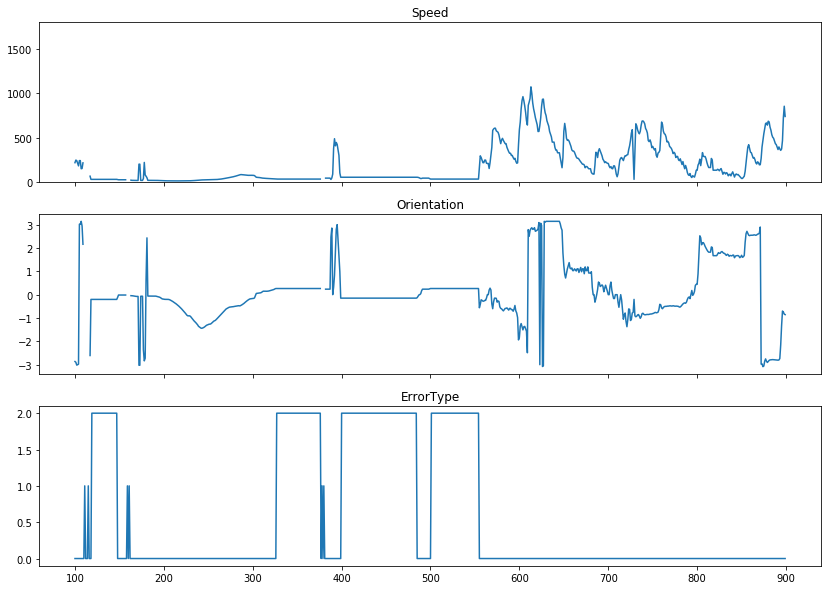

In [57]:
# plots to validate errtypes, burstgap fixes, overall data quality
fish = 0
minframe= 100
duration = 800
maxframe = minframe + duration
xx = positions[minframe:maxframe,fish,0]
yy = positions[minframe:maxframe,fish,1]
# for orientations, best to use 'smoothheadings'
orientations = ori[minframe:maxframe,fish]
spd = speeds[minframe:maxframe,fish]
errs = errType.iloc[minframe:maxframe,[fish]]

# plot orientation and speed, and (opt) nan values
f,ax=plt.subplots(3,1,sharex=True)
f.set_size_inches(14,10)
a = ax[0]
a.plot(np.arange(minframe,maxframe),spd)
a.set_ylim([0,1800])
a.set_title('Speed')
a = ax[1]
a.plot(np.arange(minframe,maxframe),orientations)
a.set_title('Orientation')
a = ax[2]
a.plot(np.arange(minframe,maxframe),errs)
a.set_title('ErrorType')

# a = ax[6]
# a.plot(np.isnan(speeds))
# a.set_title('NaN values')
# plt.show()


## Find bursts in speed trajectory

   - Build on get_kinematics function for getting BGCycle
   - Tweak parameters for burst detection (especially nback)
   - Maybe: try w both smoothed and raw trajectories, see which is better
   - Either only do for good trajectories, or note when burst is baddata

In [13]:
# time = np.arange(nframes)*dt
# burstmat, burstrate = kin.getBGcycle(speeds[:,1], time = time, nbins = 2, threshold = 250.0, burstHtthresh = 100.0, exclnans = True) 
# burstmat.set_index('n',inplace = True)

In [14]:
#oriAligned = kin.getTurns(ori[fish],bursts,time) #needs to be adapted
#timeInactive = kin.getSwimTime(speed,time) #need to adapt for nans, maybe other

In [15]:
# #plots to check burst detection

# # for testing/debug
# f0, axs = plt.subplots(6,1, figsize=(16,24))

# nplots = 6
# timestart = 4000
# twinsize = 500 #
# twinstarts = np.arange(timestart, timestart + twinsize*nplots,twinsize) 

# for i in range(nplots):
#     twinstart = twinstarts[i]
#     twinend = twinstart+twinsize
#     ind = np.arange(twinstart,twinsize+twinstart)
#     axs[i].plot(time[ind], speeds[ind,1])
#     axs[i].set_title('Fish Speed')
#     axs[i].set_ylim([0,2200])

#     bstart = burstmat.loc[(burstmat['valleyTime'] > time[twinstart]) & (burstmat['valleyTime'] < time[twinend]),['valleyTime']].values
#     bpeak = burstmat.loc[(burstmat['valleyTime'] > time[twinstart]) & (burstmat['valleyTime'] < time[twinend]),['peakTime']].values
#     bb = np.hstack([bstart,bpeak])

#     #plot speed vs time or counter
#     for xc in bb:
#         axs[i].axvline(x = xc[0],color='deepskyblue')
#         axs[i].axvline(x = xc[1],color='mediumseagreen')


In [16]:
time = np.arange(nframes)*dt
fishnames = ['fish0','fish1','fish2', 'fish3', 'fish4','fish5']

bblist = []
bratelist = []
for fish in fishIncl:
    print(fish)
    bb, bbrate = kin.getBGcycle(speeds[:,fish], time = time, nbins = 2, threshold = 250.0, burstHtthresh = 100.0, exclnans = True) 
    bb.set_index('n',inplace = True)
    bblist.append(bb.copy())
    bratelist.append(bbrate.copy())    

0


C:\Users\katic\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:795: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
C:\Users\katic\OneDrive\Documents\MPI\zfish_genetics\kc_timing\zfish_mutants_analysis_KC\get_kinematics_adult.py:267: RuntimeWarning: overflow encountered in multiply
  return a*np.exp(-c*x)+d


1
2
3
4
5


In [17]:
burstsAll = pd.concat(bblist, keys = fishnames)
bRateAll = pd.concat(bratelist, keys = fishnames)

## generate basic plots for each fish

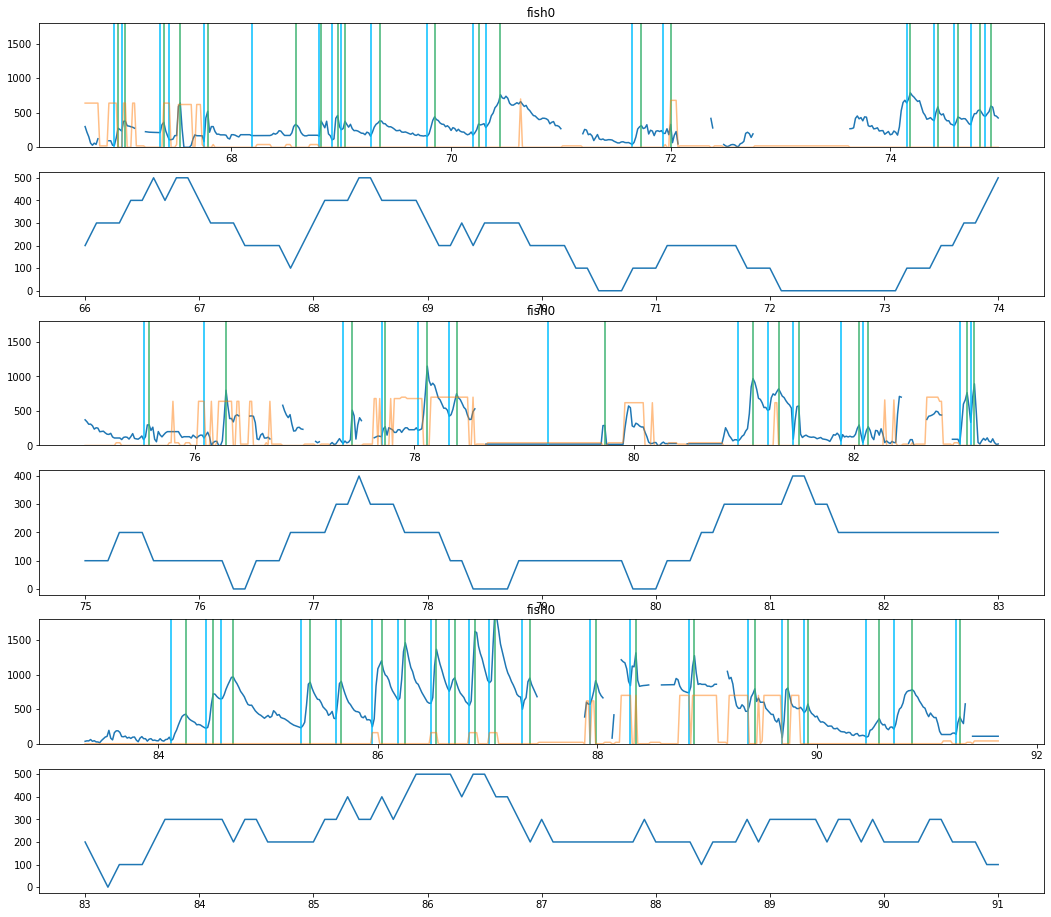

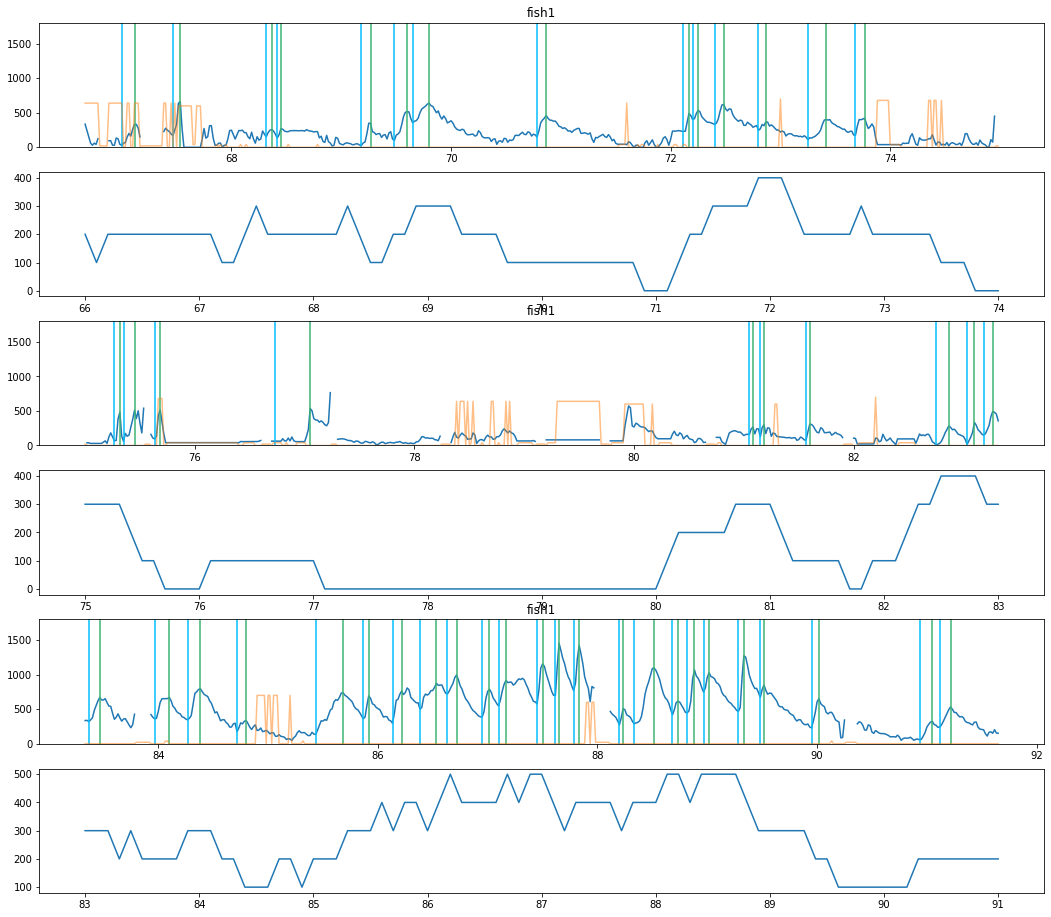

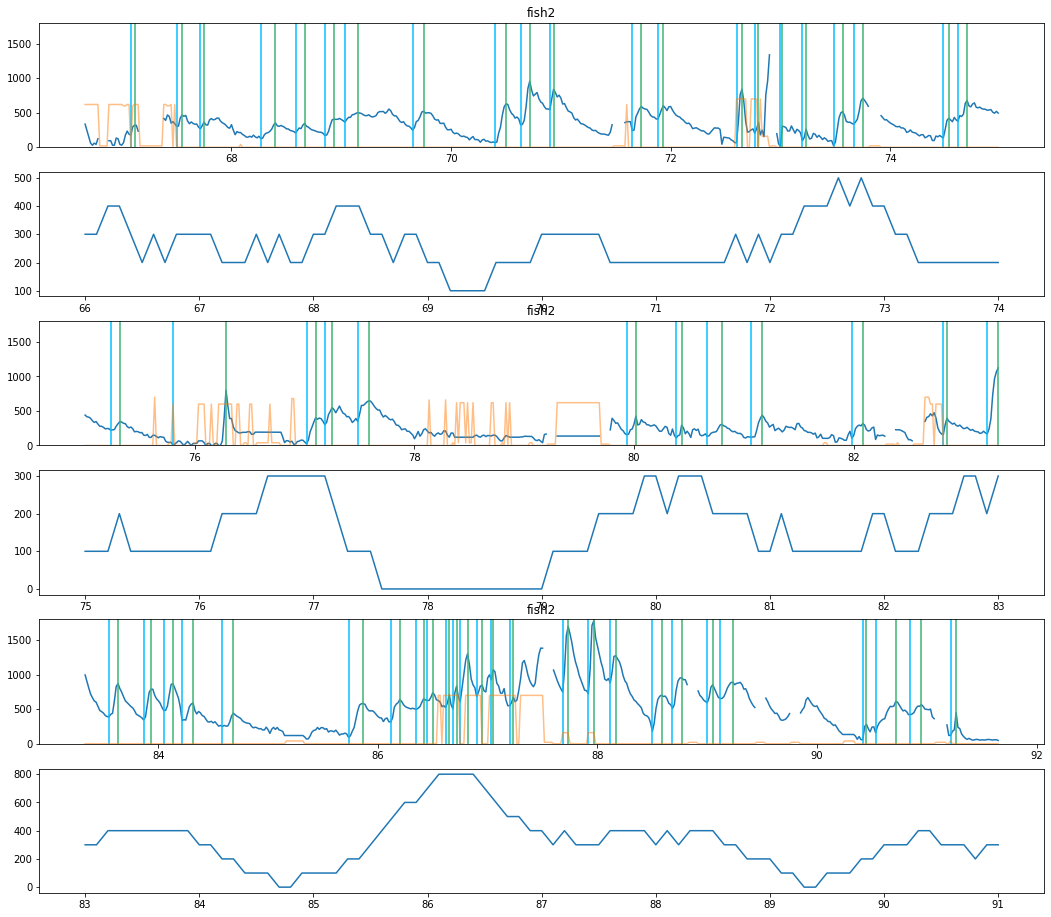

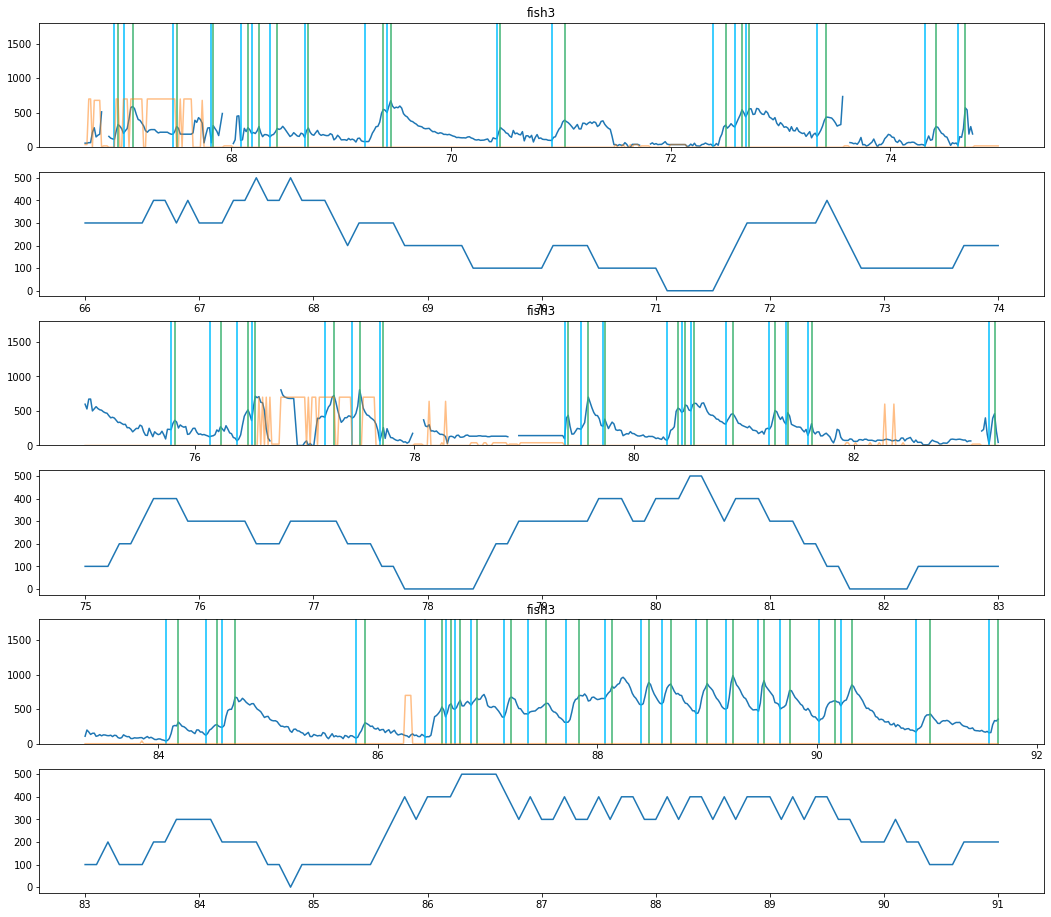

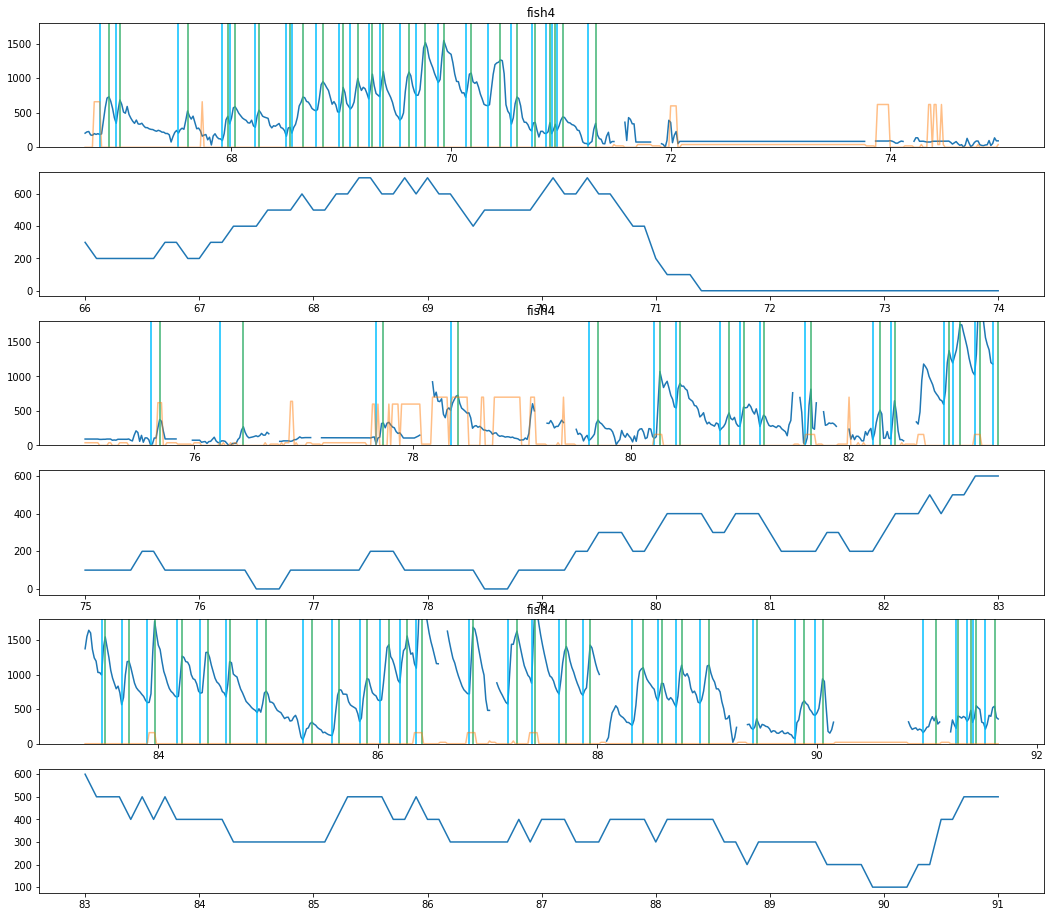

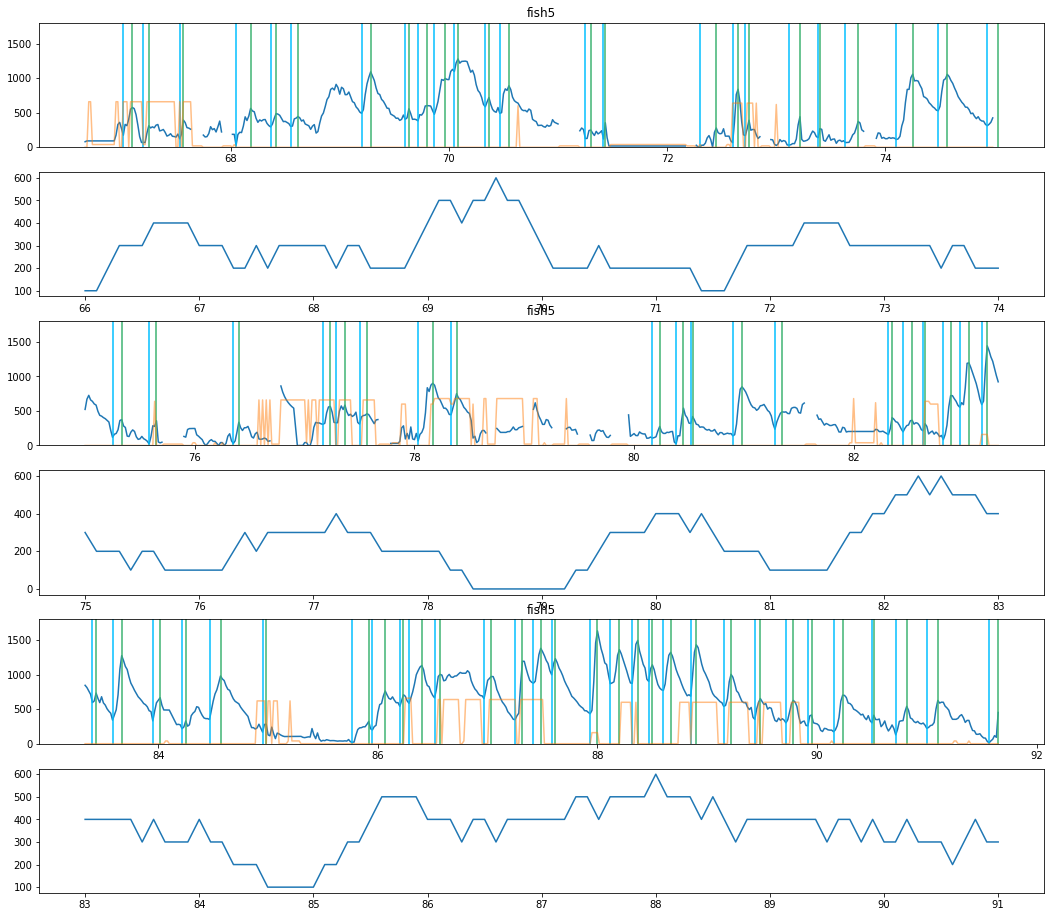

In [18]:
# example speed trajectories with burst detection & errors
for i in fishIncl:
    
    fishname = fishnames[fishIncl[i]]
    burstmat = burstsAll.loc[fishname].copy()
    burstrate = bRateAll.loc[fishname].copy()
    burstrate.set_index('tstart',inplace=True)

    nplots = 3
    f0, axs = plt.subplots(nplots*2,1, figsize=(18,16))
    timestart = 4000
    twinsize = 500 #
    twinstarts = np.arange(timestart, timestart + twinsize*nplots,twinsize) 

    for jj in range(nplots):
        j = 2*jj
        q = 2*jj+1
        twinstart = twinstarts[jj]
        twinend = twinstart+twinsize
        ind = np.arange(twinstart,twinsize+twinstart)
        
        #example speed trajectories
        axs[j].plot(time[ind], speeds[ind,i])
        axs[j].set_title(fishname)
        axs[j].set_ylim([0,1800])
        bstart = burstmat.loc[(burstmat['valleyTime'] > time[twinstart]) & (burstmat['valleyTime'] < time[twinend]),['valleyTime']].values
        bpeak = burstmat.loc[(burstmat['valleyTime'] > time[twinstart]) & (burstmat['valleyTime'] < time[twinend]),['peakTime']].values
        bb = np.hstack([bstart,bpeak])
        
        #plot burst valleys and peaks as vertical lines
        for xc in bb:
            axs[j].axvline(x = xc[0],color='deepskyblue')
            axs[j].axvline(x = xc[1],color='mediumseagreen')
        
        #errors
        errs = errType.loc[ind,fishname]
        axs[j].plot(time[ind],errs*20,alpha = 0.5)
        
        #plot burstrate below each speed window
        tstart = np.floor(np.min(time[ind]))
        tend = np.floor(np.max(time[ind]))
        axs[q].plot(burstrate.burstrate[tstart:tend]*100)
    
        

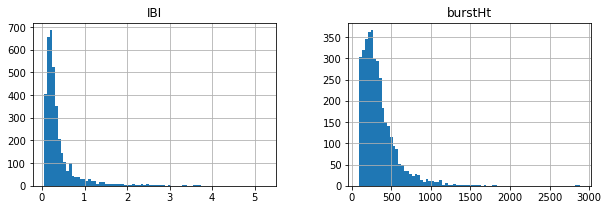

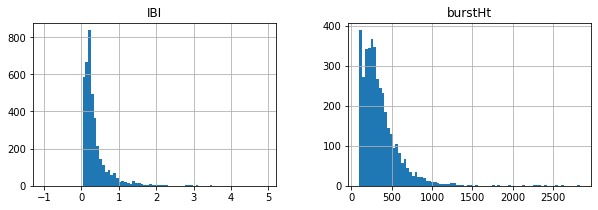

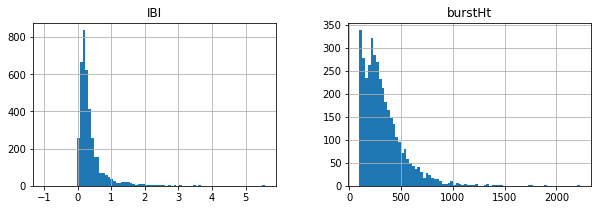

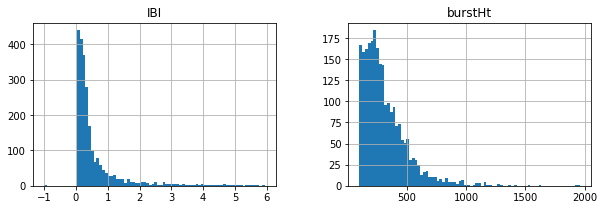

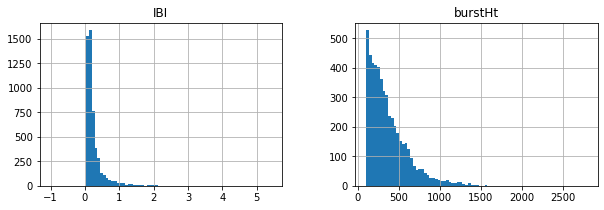

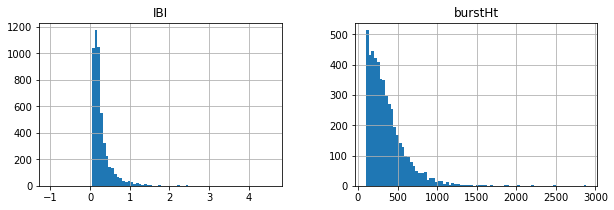

In [19]:
# histograms: burst height distribution, IBI distribution
for i in fishIncl:  
    fishname = fishnames[fishIncl[i]]
    burstmat = burstsAll.loc[fishname].copy()
    burstmat = burstmat.loc[(burstmat['burstHt']<3000) & (burstmat['IBI'] < 6)]
    
    burstmat[['burstHt',"IBI"]].hist(bins = 80, figsize = (10,3))



In [20]:

# possibly: example fits, burst distributions with add'l filters

In [21]:
# maybe: kernel or wavelet smooth; don't want to do for now (I think burst coordination analysis may be better w/o it) but consider for later

## Calculate pairwise relationships in burst timing

In [ ]:
# burst triggered average - probability of fish2 having a burst at each timepoint before and after fish1 burst
# to do: make binned
dt = 120
for ifish in fishIncl:  
    fishname = fishnames[fishIncl[ifish]]
    burstmat = burstsAll.loc[fishname].copy()
    bursttrigave = np.zeros(fishIncl.size, dt*2)
    for j in fishIncl, j!=ifish: #is this legal syntax? 
        fish2name = fishnames[fisnIncl[j]]
        binbursts = np.zeros(speed.shape[0])
        binbursts[burstsAll.loc[fish2name,'peakTime']] = 1
        periburst = np.zeros([burstmat.shape[0],dt*2])
        for i in burstmat.shape[0]
            t = burstmat.loc[i,'peakTime']
            periburst[i,:] = binbursts[t-dt:t+dt]
        bursttrigave[j] = np.mean(periburst,dim = 0)